# Plot enriched pathways for overlapping recomputed Fairfax eQTLs

This code plots the top pathways in which genes associated with Neanderthal-introgressed recomputed Fairfax eQTLs were enriched in. Monocytes in the Fairfax dataset were divided into 4 treatment groups: IFN, LPS 2h, LPS 24h and Naive.

Neanderthal SNPs from:
1. Dannemann M, Prufer K & Kelso J. Functional implications of Neandertal introgression in modern humans. *Genome Biol* 2017 **18**:61.
2. Simonti CN *et al.* The phenotypic legacy of admixture between modern humans and Neandertals. *Science* 2016 **351**:737-41.

Recomputed Fairfax *et al.* (2014) eQTLs from:
* [EMBL-EBI eQTL Catalogue](https://www.ebi.ac.uk/eqtl/Data_access/)

---


First, the list of genes and associated p-values for each condition was obtained from: `/well/jknight/shiyao/data/fairfax/EMBL_recomputed/genes_cleaned_*.txt`. This was inputted into the XGR R package  to obtain pathway enrichment information, using the following code.

```r
## Gene enrichment analysis
library(XGR)
library(RCircos)
RData.location <- "http://galahad.well.ox.ac.uk/bigdata_dev/"

# Get enriched terms
dd <- read.csv('genes_cleaned_*.txt', sep = '\t',       # where * refers to ifn/lps2/lps24/naive
               header = FALSE, check.names = TRUE) 
eTerm <- xEnricherGenes(data=as.character(dd$V1), ontology="MsigdbC2CPall", RData.location=RData.location)

# Visualise top 30 enriched pathways
res <- xEnrichViewer(eTerm, top_num=30, sortBy="adjp",details=TRUE)

# Save enrichment results to the file called 'enrichment.txt'
output <- data.frame(term=rownames(res), res)
utils::write.table(output, file="enrichment.txt", sep="\t",row.names=FALSE)
```

---


Next, enriched pathways were plotted in Python using the enrichment.txt files.

In [1]:
# Import modules
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import textwrap
import numpy as np
sns.set()

### IFN

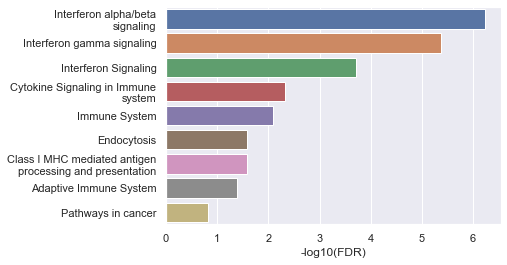

In [2]:
enrich = pd.read_csv('ifn_enrichment.txt', sep='\t')
enrich['-log10(FDR)'] = -np.log10(enrich['adjp'])
enrich.sort_values("-log10(FDR)", ascending=False)
to_plot = enrich.iloc[0:15]
ax = sns.barplot(x="-log10(FDR)", y="name", data=to_plot, dodge=False)
ax.set(xlabel='-log10(FDR)', ylabel='')
ax.set_yticklabels((textwrap.fill(y.get_text(), 30) for y in ax.get_yticklabels()))
plt.show()

### Naive

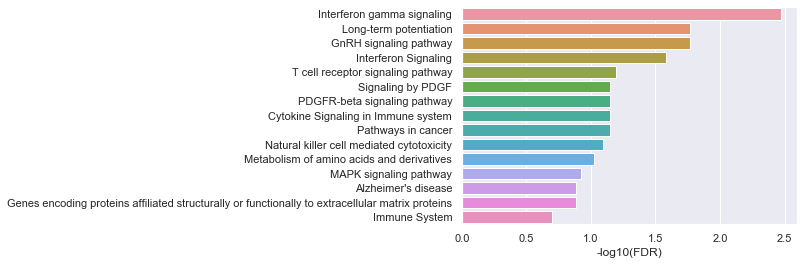

In [3]:
enrich = pd.read_csv('naive_enrichment.txt', sep='\t')
enrich['-log10(FDR)'] = -np.log10(enrich['adjp'])
enrich.sort_values("-log10(FDR)", ascending=False)
to_plot = enrich.iloc[0:15]
ax = sns.barplot(x="-log10(FDR)", y="name", data=to_plot, dodge=False)
ax.set(xlabel='-log10(FDR)', ylabel='')
plt.show()

### LPS24

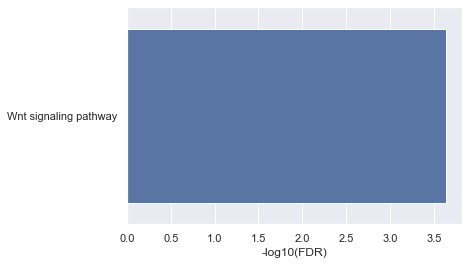

In [4]:
enrich = pd.read_csv('lps24_enrichment.txt', sep='\t')
enrich['-log10(FDR)'] = -np.log10(enrich['adjp'])
enrich.sort_values("-log10(FDR)", ascending=False)
to_plot = enrich.iloc[0:15]
ax = sns.barplot(x="-log10(FDR)", y="name", data=to_plot, dodge=False)
ax.set(xlabel='-log10(FDR)', ylabel='')
ax.set_yticklabels((textwrap.fill(y.get_text(), 30) for y in ax.get_yticklabels()))
plt.show()